In [20]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso # difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

In [3]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target

In [5]:
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print (newX[0:3] )# check

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]


In [6]:
newY=boston_df['Price']

In [7]:
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))

152 152


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

In [10]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

In [11]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [14]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

In [15]:
print('Linear regression train score:',train_score)
print('Linear regression test score:',test_score)
print("=========================================")
print('Ridge regression train score:',Ridge_train_score)
print('Ridge regression test score:',Ridge_test_score)
print("=========================================")
print('Ridge regression train score with alpha=100:',Ridge_train_score100)
print('Ridge regression test score with alpha=100:',Ridge_test_score100)

Linear regression train score 0.7419034960343789
Linear regression test score 0.7147895265576851
Rigid regression train score 0.7419030253527293
Rigid regression test score 0.7146125373123909
Rigid regression train score alpha=100 0.7172809669938278
Rigid regression test score 0.6805765856921935


In [17]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0, 110, 0.1), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(X_train, y_train)
print('alpha: %f' % model.alpha_)

alpha: 0.700000


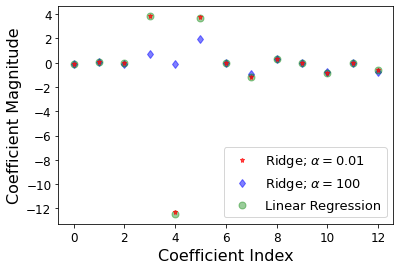

In [18]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [19]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
cancer=load_breast_cancer()

In [22]:
#print cancer.keys()
cancer_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [24]:
#print cancer_df.head(3)
x = cancer.data
y = cancer.target

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [26]:
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
train_score=lasso.score(x_train,y_train)
train_score

0.5585119496923179

In [28]:
test_score=lasso.score(x_test,y_test)
test_score

0.5977625953294468

In [29]:
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score )
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.5585119496923179
test score:  0.5977625953294468
number of features used:  3


In [30]:
lasso01=Lasso(alpha=0.01,max_iter=10e5)
lasso01.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
train_score01=lasso01.score(x_train,y_train)
train_score01

0.6924797997711434

In [32]:
test_score01=lasso01.score(x_test,y_test)
test_score01

0.6613848332110002

In [33]:
coeff_used01 = np.sum(lasso01.coef_!=0)
print ("training score for alpha=0.01:", train_score01)
print ("test score for alpha =0.01: ", test_score01)
print ("number of features used: for alpha =0.01:", coeff_used01)

training score for alpha=0.01: 0.6924797997711434
test score for alpha =0.01:  0.6613848332110002
number of features used: for alpha =0.01: 8


In [34]:
lasso0001=Lasso(alpha=0.0001,max_iter=10e5)
lasso0001.fit(x_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
train_score0001=lasso0001.score(x_train,y_train)
train_score0001

0.7739833249526441

In [36]:
test_score0001=lasso0001.score(x_test,y_test)
test_score0001

0.7218706771961753

In [37]:
coeff_used0001 = np.sum(lasso0001.coef_!=0)
print ("training score for alpha=0.0001:", train_score0001)
print ("test score for alpha =0.0001: ", test_score0001)
print ("number of features used: for alpha =0.0001:", coeff_used0001)

training score for alpha=0.0001: 0.7739833249526441
test score for alpha =0.0001:  0.7218706771961753
number of features used: for alpha =0.0001: 22


In [38]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lr_train_score=lr.score(x_train,y_train)
lr_train_score

0.7848717384526138

In [40]:
lr_test_score=lr.score(x_test,y_test)
lr_test_score

0.7198934261279892

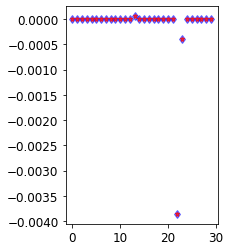

In [41]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'lasso: $\alpha=1$',zorder=7)
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso: $\alpha=0.01$')

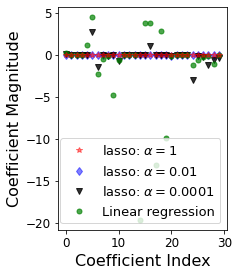

In [43]:
plt.subplot(1,2,2)
#alpha here in plot is for transparency
plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='*',markersize=6,color='red',label=r'lasso: $\alpha=1$',zorder=7)
plt.plot(lasso01.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso: $\alpha=0.01$')
plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'lasso: $\alpha=0.0001$')
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In [44]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [46]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=200)
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
fi=rfmodel.feature_importances_

In [48]:
fi>.08

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [49]:
l=cancer_df.columns

<BarContainer object of 30 artists>

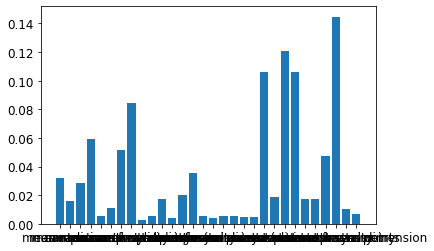

In [50]:
plt.bar(l,fi)